In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [406]:
df = pd.read_csv('satis.csv')

In [407]:
df.head()

,Tarix,Mağaza,Kart_nomresi,Transaksiya_id,Məhsul_nomresi,Məhsul_adi,Məhsul sayi,Ümumi satış
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [408]:
df.shape

(264836, 8)

In [409]:
df.columns=df.columns.str.lower()
df.columns

Index(['tarix', 'mağaza', 'kart_nomresi', 'transaksiya_id', 'məhsul_nomresi',
       'məhsul_adi', 'məhsul sayi', 'ümumi satış'],
      dtype='object')

In [410]:
info={}
def find_info(data):
    for i in data.columns:
      nunique_val=df[i].nunique()
      null_sum=df[i].isnull().sum()
      info[i]=[df[i].dtype,nunique_val,df[i].isnull().sum()]
      info_df=pd.DataFrame(info,index=['dtype','nunique_val','null_sum']).T
    return info_df

find_info(df)

,dtype,nunique_val,null_sum
tarix,int64,364,0
mağaza,int64,272,0
kart_nomresi,int64,72637,0
transaksiya_id,int64,263127,0
məhsul_nomresi,int64,114,0
məhsul_adi,object,114,0
məhsul sayi,int64,6,0
ümumi satış,float64,112,0


In [411]:
df.drop('transaksiya_id',axis=1,inplace=True)

In [412]:
df['məhsul_adi'].value_counts()

məhsul_adi
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

In [413]:
df['qram'] = df['məhsul_adi'].str.extract(r'(\d+g)')

df['məhsul_adi'] = df['məhsul_adi'].str.replace(r'\s*\d+g', '', regex=True)

df['qram'] = df['qram'].str.replace('g', '')




In [414]:
df.head()

,tarix,mağaza,kart_nomresi,məhsul_nomresi,məhsul_adi,məhsul sayi,ümumi satış,qram
0,43390,1,1000,5,Natural Chip Compny SeaSalt,2,6.0,175
1,43599,1,1307,66,CCs Nacho Cheese,3,6.3,175
2,43605,1,1343,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,43329,2,2373,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175
4,43330,2,2426,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150


In [415]:
df = df[df['məhsul_adi'].str.contains('chips', case=False, na=False)]

In [416]:
df.shape

(49770, 8)

In [417]:
df.head()

,tarix,mağaza,kart_nomresi,məhsul_nomresi,məhsul_adi,məhsul sayi,ümumi satış,qram
2,43605,1,1343,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
6,43601,4,4149,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,330
10,43602,7,7215,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,330
14,43600,19,19272,44,Thins Chips Light& Tangy,1,3.3,175
33,43603,45,45220,22,Thins Chips Originl saltd,1,3.3,175


In [418]:
df['məhsul_adi'].value_counts()

məhsul_adi
Cobs Popd Swt/Chlli &Sr/Cream Chips    3269
Cobs Popd Sea Salt  Chips              3265
Thins Potato Chips  Hot & Spicy        3229
Doritos Corn Chips  Cheese Supreme     3217
Smiths Crinkle Chips Salt & Vinegar    3197
Thins Chips Light&  Tangy              3188
Doritos Corn Chips  Nacho Cheese       3160
Cobs Popd Sour Crm  &Chives Chips      3159
Doritos Corn Chips  Original           3121
Thins Chips Seasonedchicken            3114
Thins Chips Salt &  Vinegar            3103
WW Supreme Cheese   Corn Chips         1509
WW Original Corn    Chips              1495
Smiths Crinkle Cut  Chips Barbecue     1489
WW Original Stacked Chips              1487
Smiths Crinkle Cut  Chips Chicken      1484
WW Sour Cream &OnionStacked Chips      1483
Smiths Crinkle Cut  Chips Chs&Onion    1481
Smiths Crinkle Cut  Chips Original     1461
Thins Chips         Originl saltd      1441
French Fries Potato Chips              1418
Name: count, dtype: int64

In [419]:
def categorize_chips(name):
    name_lower = name.lower()

    if 'salt & vinegar' in name_lower:
        return 'Salt & Vinegar'
    elif 'cheese supreme' in name_lower:
        return 'Cheese Supreme'
    elif 'hot & spicy' in name_lower:
        return 'Hot & Spicy'
    elif 'sour cream & onion' in name_lower:
        return 'Sour Cream & Onion'
    elif 'barbecue' in name_lower:
        return 'Barbecue'
    elif 'nacho cheese' in name_lower:
        return 'Nacho Cheese'
    elif 'chicken' in name_lower:
        return 'Chicken'
    elif 'original' in name_lower:
        return 'Original'
    else:
        return 'Other'

df['category'] = df['məhsul_adi'].apply(categorize_chips)


In [420]:
df.head()

,tarix,mağaza,kart_nomresi,məhsul_nomresi,məhsul_adi,məhsul sayi,ümumi satış,qram,category
2,43605,1,1343,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Chicken
6,43601,4,4149,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,330,Salt & Vinegar
10,43602,7,7215,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,330,Salt & Vinegar
14,43600,19,19272,44,Thins Chips Light& Tangy,1,3.3,175,Other
33,43603,45,45220,22,Thins Chips Originl saltd,1,3.3,175,Other


In [421]:
import re

In [422]:
def remove_category_keywords(name, category):
    keywords = {
        'Salt & Vinegar': 'salt & vinegar',
        'Cheese Supreme': 'cheese supreme',
        'Hot & Spicy': 'hot & spicy',
        'Sour Cream & Onion': 'sour cream & onion',
        'Barbecue': 'barbecue',
        'Nacho Cheese': 'nacho cheese',
        'Chicken': 'chicken',
        'Original': 'original'
    }

    if category in keywords:
        pattern = keywords[category]
        name = re.sub(pattern, '', name, flags=re.I)
    return name.strip()

df['cleaned_mehsul_adi'] = df.apply(lambda row: remove_category_keywords(row['məhsul_adi'], row['category']), axis=1)



In [423]:
df.head()

,tarix,mağaza,kart_nomresi,məhsul_nomresi,məhsul_adi,məhsul sayi,ümumi satış,qram,category,cleaned_mehsul_adi
2,43605,1,1343,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Chicken,Smiths Crinkle Cut Chips
6,43601,4,4149,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,330,Salt & Vinegar,Smiths Crinkle Chips
10,43602,7,7215,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,330,Salt & Vinegar,Smiths Crinkle Chips
14,43600,19,19272,44,Thins Chips Light& Tangy,1,3.3,175,Other,Thins Chips Light& Tangy
33,43603,45,45220,22,Thins Chips Originl saltd,1,3.3,175,Other,Thins Chips Originl saltd


In [424]:
df.drop('məhsul_adi',axis=1,inplace=True)

In [425]:
df.head()

,tarix,mağaza,kart_nomresi,məhsul_nomresi,məhsul sayi,ümumi satış,qram,category,cleaned_mehsul_adi
2,43605,1,1343,61,2,2.9,170,Chicken,Smiths Crinkle Cut Chips
6,43601,4,4149,16,1,5.7,330,Salt & Vinegar,Smiths Crinkle Chips
10,43602,7,7215,16,1,5.7,330,Salt & Vinegar,Smiths Crinkle Chips
14,43600,19,19272,44,1,3.3,175,Other,Thins Chips Light& Tangy
33,43603,45,45220,22,1,3.3,175,Other,Thins Chips Originl saltd


In [426]:
df['tarix'] = pd.to_datetime(df['tarix'], origin='1899-12-30', unit='D')

In [427]:
df.head()

,tarix,mağaza,kart_nomresi,məhsul_nomresi,məhsul sayi,ümumi satış,qram,category,cleaned_mehsul_adi
2,2019-05-20,1,1343,61,2,2.9,170,Chicken,Smiths Crinkle Cut Chips
6,2019-05-16,4,4149,16,1,5.7,330,Salt & Vinegar,Smiths Crinkle Chips
10,2019-05-17,7,7215,16,1,5.7,330,Salt & Vinegar,Smiths Crinkle Chips
14,2019-05-15,19,19272,44,1,3.3,175,Other,Thins Chips Light& Tangy
33,2019-05-18,45,45220,22,1,3.3,175,Other,Thins Chips Originl saltd


In [428]:
# df['year'] = df['tarix'].dt.year
# df['month'] = df['tarix'].dt.month
# df['day'] = df['tarix'].dt.day

# df = df.drop('tarix', axis=1)


In [429]:
df['category'].value_counts()

category
Other             23316
Original           7564
Chicken            4598
Hot & Spicy        3229
Cheese Supreme     3217
Salt & Vinegar     3197
Nacho Cheese       3160
Barbecue           1489
Name: count, dtype: int64

In [430]:
df['cleaned_mehsul_adi'].value_counts()

cleaned_mehsul_adi
Doritos Corn Chips                     9498
Smiths Crinkle Cut  Chips              4434
Cobs Popd Swt/Chlli &Sr/Cream Chips    3269
Cobs Popd Sea Salt  Chips              3265
Thins Potato Chips                     3229
Smiths Crinkle Chips                   3197
Thins Chips Light&  Tangy              3188
Cobs Popd Sour Crm  &Chives Chips      3159
Thins Chips Seasoned                   3114
Thins Chips Salt &  Vinegar            3103
WW Supreme Cheese   Corn Chips         1509
WW  Corn    Chips                      1495
WW  Stacked Chips                      1487
WW Sour Cream &OnionStacked Chips      1483
Smiths Crinkle Cut  Chips Chs&Onion    1481
Thins Chips         Originl saltd      1441
French Fries Potato Chips              1418
Name: count, dtype: int64

In [431]:
df['cleaned_mehsul_adi'] = df['cleaned_mehsul_adi'].apply(lambda x: ' '.join(x.split()[0]))

In [432]:
df['cleaned_mehsul_adi'].value_counts()

cleaned_mehsul_adi
T h i n s        14075
C o b s           9693
D o r i t o s     9498
S m i t h s       9112
W W               5974
F r e n c h       1418
Name: count, dtype: int64

In [433]:
df = df.drop(columns = ['kart_nomresi'])

In [434]:
df.head()

,tarix,mağaza,məhsul_nomresi,məhsul sayi,ümumi satış,qram,category,cleaned_mehsul_adi
2,2019-05-20,1,61,2,2.9,170,Chicken,S m i t h s
6,2019-05-16,4,16,1,5.7,330,Salt & Vinegar,S m i t h s
10,2019-05-17,7,16,1,5.7,330,Salt & Vinegar,S m i t h s
14,2019-05-15,19,44,1,3.3,175,Other,T h i n s
33,2019-05-18,45,22,1,3.3,175,Other,T h i n s


# Data visualization

In [435]:
import seaborn as sns
import matplotlib.pyplot as plt

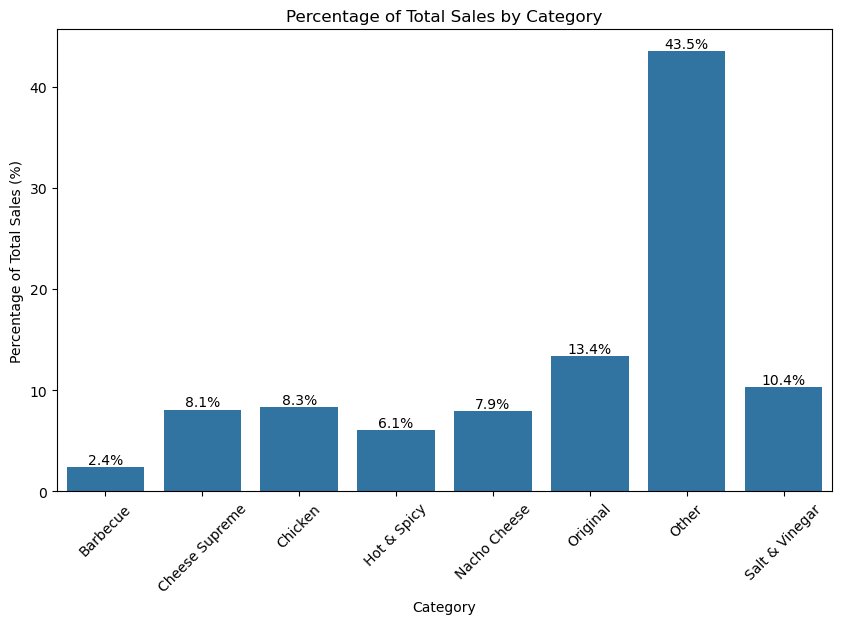

In [436]:
category_sales = df.groupby('category')['ümumi satış'].sum().reset_index()
total_sales = category_sales['ümumi satış'].sum()

# Calculate percentage for each category
category_sales['Percentage'] = (category_sales['ümumi satış'] / total_sales) * 100

# Plot percentage by category
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='category', y='Percentage', data=category_sales)

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Percentage of Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Percentage of Total Sales (%)')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

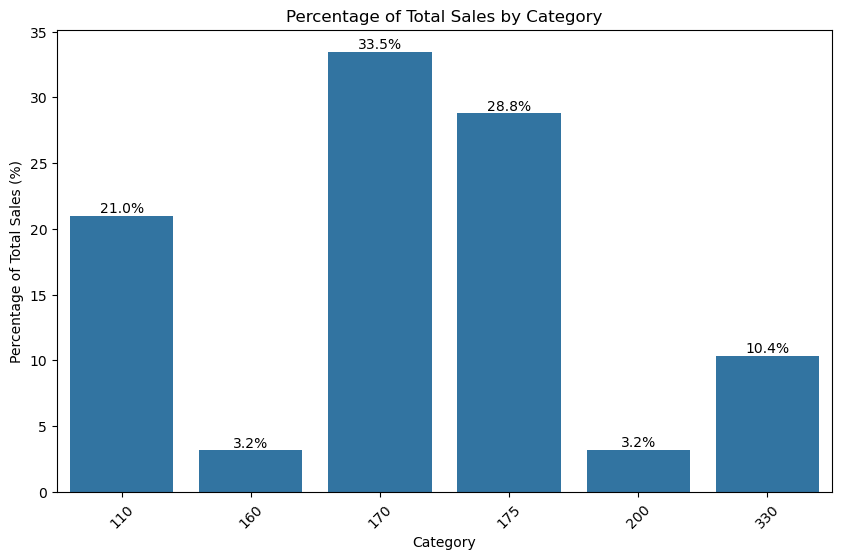

In [437]:
category_sales = df.groupby('qram')['ümumi satış'].sum().reset_index()
total_sales = category_sales['ümumi satış'].sum()

# Calculate percentage for each category
category_sales['Percentage'] = (category_sales['ümumi satış'] / total_sales) * 100

# Plot percentage by category
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='qram', y='Percentage', data=category_sales)

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Percentage of Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Percentage of Total Sales (%)')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

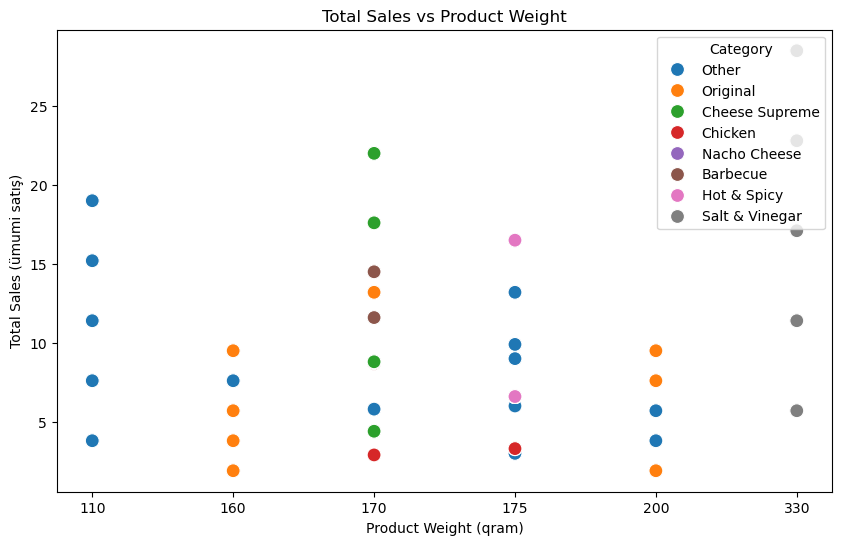

In [438]:

df_sorted = df.sort_values(by='qram')

# Create the scatter plot with sorted x values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='qram', y='ümumi satış', hue='category', data=df_sorted, s=100)
plt.title('Total Sales vs Product Weight')
plt.xlabel('Product Weight (qram)')
plt.ylabel('Total Sales (ümumi satış)')
plt.legend(title='Category')
plt.show()

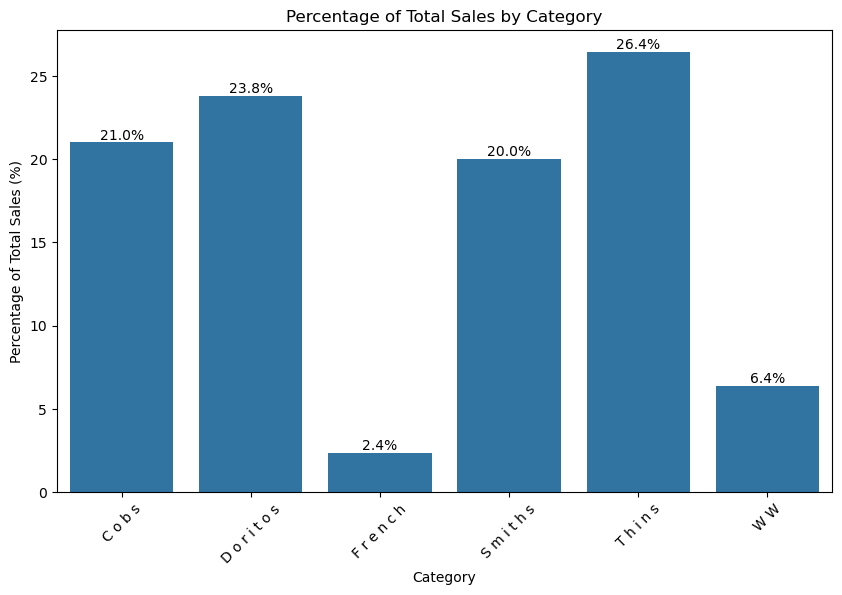

In [439]:
category_sales = df.groupby('cleaned_mehsul_adi')['ümumi satış'].sum().reset_index()
total_sales = category_sales['ümumi satış'].sum()

# Calculate percentage for each category
category_sales['Percentage'] = (category_sales['ümumi satış'] / total_sales) * 100

# Plot percentage by category
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='cleaned_mehsul_adi', y='Percentage', data=category_sales)

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Percentage of Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Percentage of Total Sales (%)')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

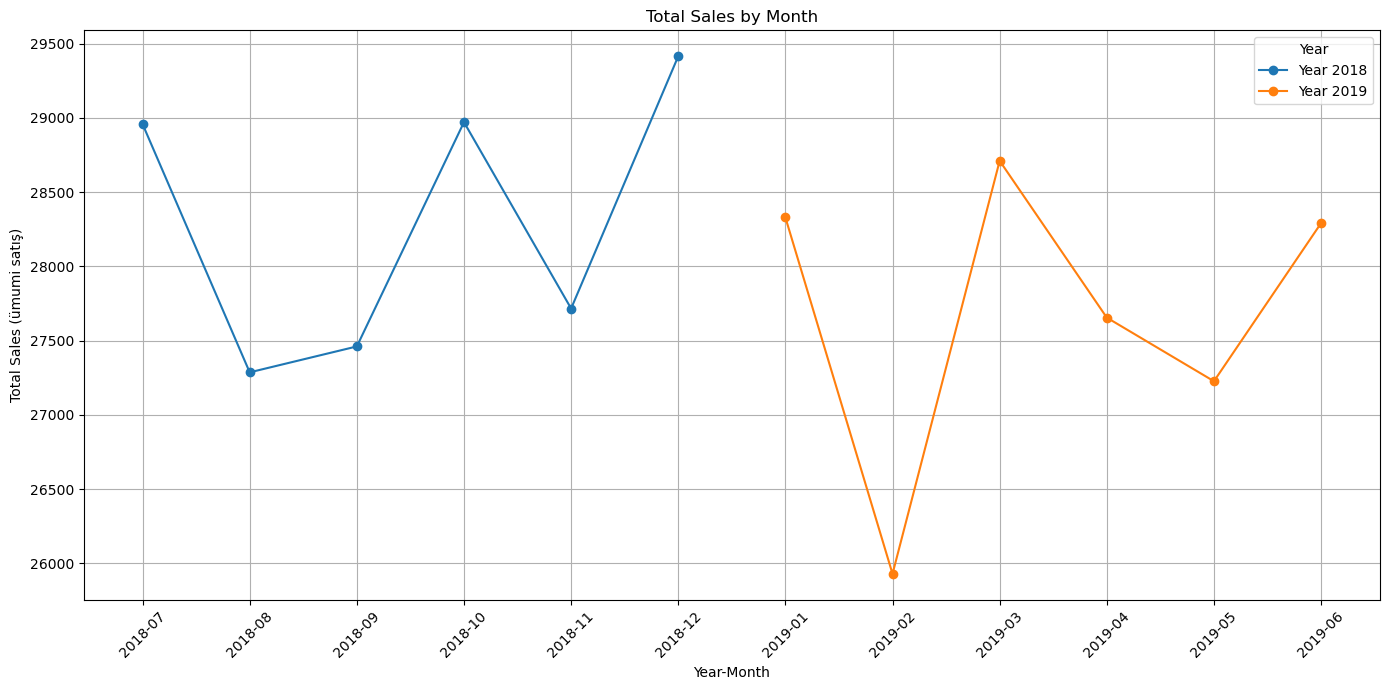

In [445]:
import pandas as pd
import matplotlib.pyplot as plt

# Copy the DataFrame and convert 'tarix' to datetime
df_copy = df.copy()
df_copy['tarix'] = pd.to_datetime(df_copy['tarix'])
df_copy['Year'] = df_copy['tarix'].dt.year
df_copy['Month'] = df_copy['tarix'].dt.to_period('M')  # Add month information

# Group by year and month and sum the 'ümumi satış'
monthly_sales = df_copy.groupby(['Year', 'Month'])['ümumi satış'].sum().reset_index()

# Convert 'Month' from Period to string for plotting
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

# Plot total sales by year and month
plt.figure(figsize=(14, 7))
for year in monthly_sales['Year'].unique():
    subset = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(subset['Month'], subset['ümumi satış'], marker='o', linestyle='-', label=f'Year {year}')

plt.title('Total Sales by Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales (ümumi satış)')
plt.grid(True)
plt.legend(title='Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


PIPELINE PART

In [317]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

In [318]:
from sklearn.compose import make_column_selector

categorical_cols=make_column_selector(dtype_include='object')
numerical_cols=make_column_selector(dtype_include='number')

In [319]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [320]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

In [321]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [322]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


In [323]:
X = df.drop('ümumi satış',axis=1)
y = df['ümumi satış']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [324]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B423D34820>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B423D36740>)])),
                ('model', LinearRegression())])

In [325]:
predictions = pipeline.predict(X_test)


In [326]:
predictions

array([11.20079622,  7.57054821,  7.57464277, ...,  5.25581988,
        6.61566545,  0.53175553])

In [327]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2}")


Mean Squared Error: 0.12255781229839391
R² Score: 0.9733379124346127


In [328]:
y_train_pred = pipeline.predict(X_train)

In [329]:
r2_score(y_train, y_train_pred)

0.9789205870213673

In [330]:
r2_score(y_test, predictions)

0.9733379124346127

In [331]:
mean_squared_error(y_train, y_train_pred)

0.09814708237767823